# COMP S493F Lab 2

In [ ]:
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_CPP_MIN_LOG_LEVEL=2


In this lesson, you'll work on:

- creating plots using Matplotlib, and
- running Keras code and plotting history.

### Student name: *Lo Tsz Kin*


# Creating plots using Matplotlib

*Matplotlib* is a Python library for creating charts, or plots. By convention, we import the `matplotlib.pyplot` module as the name `plt`.

## Line plots

The following is a very simple example of creating a line graph, or line plot. It uses the `plot()` function to plot a few `y` values stored in a list. The `x` values are by default the index values of the `y` list, i.e. `[0, 1, 2, 3]`. Since the `plot()` function call is the last expression in the code cell, Colab displays its return value.

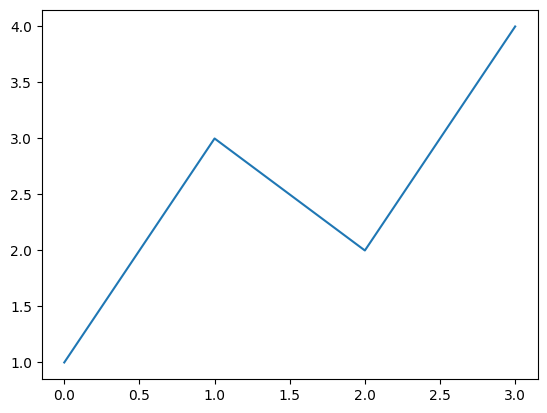

In [ ]:
import matplotlib.pyplot as plt
y = [1, 3, 2, 4]
plt.plot(y)  # x data default to indices, i.e. [0, 1, 2, 3]

The next example plots the sine function. In order to obtain a smooth curve, we create 1000 `x` values from 0 to 2$\pi$ using the NumPy `np.linspace()` function. Then, the sine values of these `x` values are computed using the `np.sin(x)` function; this application of an operation (here sine) to all items in a NumPy array (here `x`) is called *vectorization*. After that, we set the x-axis label, y-axis label, and plot title. The semicolon `;` suppresses the last expression value in Colab.

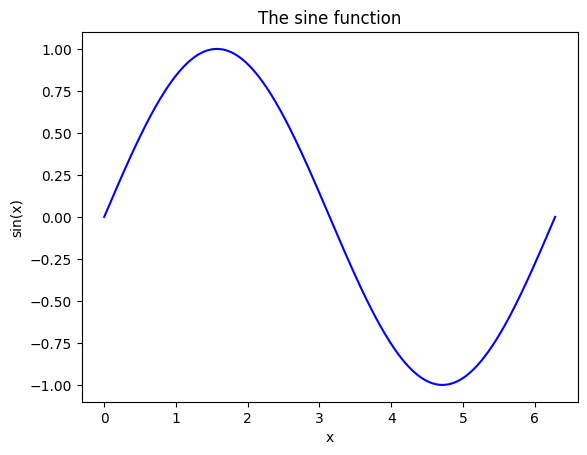

In [ ]:
import numpy as np
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)  # NumPy vectorization
plt.plot(x, y,"b")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("The sine function");  # trailing ; to hide last expression value

Multiple curves can be drawn on the same plot. The code below invokes the `plot()` function two times to draw the sine and cosine curves. The `label` parameters in `plot()` specify the labels of the curves; to show these labels in a legend box, we call the `legend()` function.

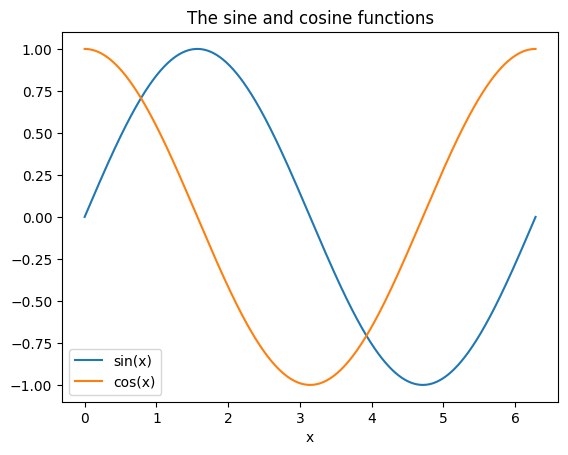

In [ ]:
import numpy as np
x = np.linspace(0, 2 * np.pi, 1000)
plt.plot(x, np.sin(x), label="sin(x)")
plt.plot(x, np.cos(x), label="cos(x)")
plt.legend()  # show the legend of labels (need to call if did not call , will not show )
plt.xlabel("x")
plt.title("The sine and cosine functions");

## Scatter plots

A scatter plot shows data points as dots (or other markers) without line segments joining the dots. In Matplotlib, two ways of creating scatter plots are specifying the `"o"` marker in the `plot()` function, and using the `scatter()` function. These are demonstrated below.

Here, 20 (instead of 1000) `x` values are used so that the dots can be seen clearly. In the `plot()` function call, the third argument `"or"` achieves two purposes: `"o"` for drawing big dots without joining line segments, and `"r"` for using the red color. The `scatter()` function draws the big dots using the default blue color.

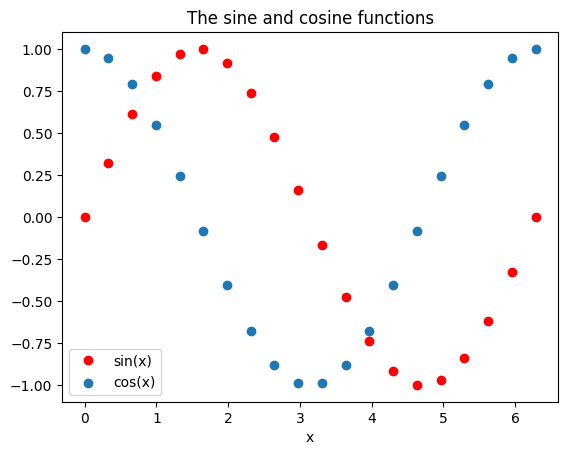

In [ ]:
import numpy as np
x = np.linspace(0, 2 * np.pi, 20)  # 20 points for better view
plt.plot(x, np.sin(x), "or", label="sin(x)")  # "o" --> big dots; "r" -> red
plt.scatter(x, np.cos(x), label="cos(x)")
plt.legend()  # show the legend of labels
plt.xlabel("x")
plt.title("The sine and cosine functions");

# Practice - Question 1 of 2

## Q1a

Write code to create a line graph of the tangent function as follows:

- Import the `matplotlib.pyplot` and `numpy` modules.
- Create an array of 1000 `x` values from 0 to 2$\pi$.
- Create an array called `y` to contain the tangent values of `x`. Use the `np.tan()` function.
- Plot the `x` and `y` values in a line graph.
- Set the x-axis label to "x", y-axis label to "tan(x)", the plot title to "The tangent function".
- Set the y limits of the plot to `[-10, 10]`, by calling `plt.ylim([-10, 10])`. This is done because Matplotlib tries to cater for huge tangent values, which makes the plot difficult to view; setting the y limits omits the effects of the huge tangent values.

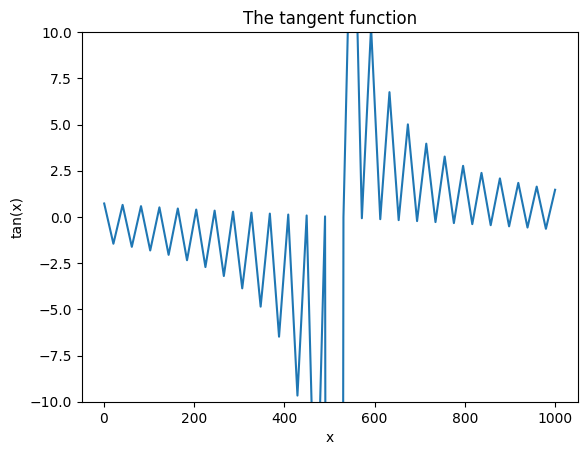

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.2*np.pi,1000)
y= np.tan(x)

plt.plot(x,y)

plt.xlabel("x")
plt.ylabel("tan(x)")
plt.title("The tangent function")

plt.ylim([-10, 10])

plt.show()

## Q1b

Repeat the above program of a tangent plot but using a scatter plot instead of a line graph. Specifically, copy the above program and make these changes:

- Use 50 `x` values (instead of 1000).
- Create a scatter plot (instead of a line graph). You may use either `plot()` or `scatter()`.

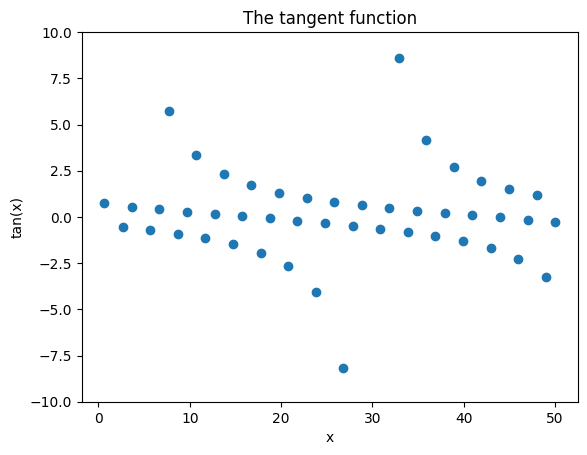

In [ ]:

x = np.linspace(0.2*np.pi,50)
y= np.tan(x)

plt.scatter(x,y)

plt.xlabel("x")
plt.ylabel("tan(x)")
plt.title("The tangent function")

plt.ylim([-10, 10])

plt.show()

## &#x2766;

# Running Keras code and plotting history

In this section, some Keras programs are provided to you for execution and plotting of history. Note that it is not required that you fully understand the Keras code (in this lesson).

## Perceptron and OR gate

The program below simulates a perceptron (which has output of either exactly 0 or 1) by a Keras sigmoid neuron (which has output of a floating point number between 0.0 and 1.0). The program trains the neuron, i.e. the model, to predict the OR gate outputs, and then displays the actual outputs and predicted outputs for the 4 training examples.

In [ ]:
# Simulate a perceptron by a sigmoid neuron,
# with a float output between 0.0 and 1.0.
import numpy as np
from tensorflow import keras
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] | X[:, 1]
keras.utils.set_random_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(1, activation="sigmoid")
])
opt = keras.optimizers.RMSprop(learning_rate=.1)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["acc"])
history = model.fit(X, y, epochs=300, verbose=0)
y_pred = model.predict(X, verbose=0)
print("Actual y:", y)
print("Predicted y:", y_pred.round(2).ravel())

Actual y: [0 1 1 1]
Predicted y: [0. 1. 1. 1.]


As the actual outputs equal the predicted outputs, the model seems to be able to predict the OR gate outputs. Let's plot the performance of the model when it is trained. The training `history` is returned by `model.fit()`; note that `history.history` is a dictionary with two keys: "loss" and "acc".

In [ ]:
print(type(history.history))
print(history.history.keys())

<class 'dict'>
dict_keys(['loss', 'acc'])


All in all, `history.history["loss"]` is a list of loss, or error, values for different epochs. `history.history["acc"]` is a list of accuracy values for different epochs.

This is a plot of the training loss, which decreases steadily to about 0 in 200 epochs.

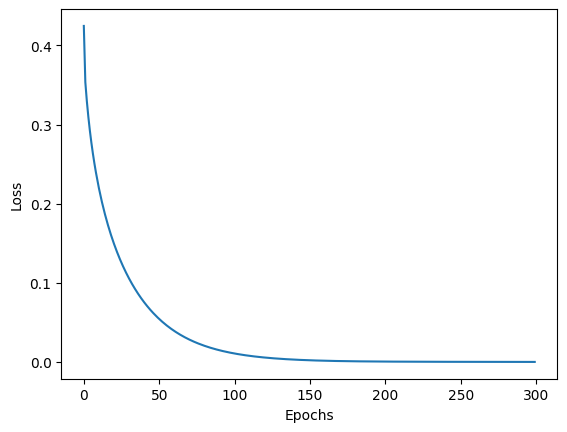

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss");

This is a plot of the training accuracy, which becomes 1.0 in a smaller number (<50) of epochs.

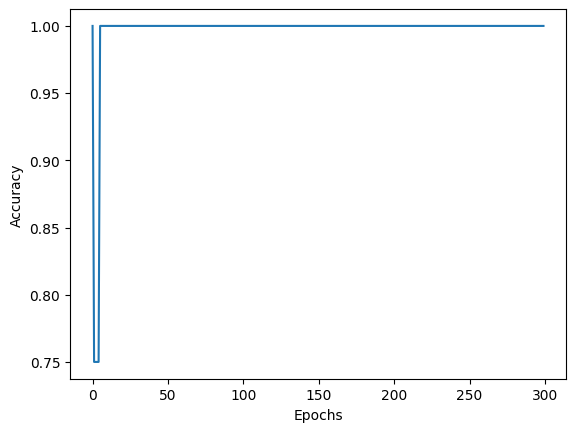

In [ ]:
plt.plot(history.history["acc"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy");

## Perceptron and XOR gate

The following program simulates a perceptron by a sigmoid neuron for predicting the XOR gate outputs.

In [ ]:
# Simulate a perceptron by a sigmoid neuron,
# with a float output between 0.0 and 1.0.
import numpy as np
from tensorflow import keras
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
keras.utils.set_random_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(1, activation="sigmoid")
])
opt = keras.optimizers.RMSprop(learning_rate=.1)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["acc"])
history = model.fit(X, y, epochs=300, verbose=0)
y_pred = model.predict(X, verbose=0)
print("Actual y:", y)
print("Predicted y:", y_pred.round(2).ravel())

Actual y: [0 1 1 0]
Predicted y: [0.49 0.48 0.48 0.46]


The differences between the actual outputs and predicted outputs indicate that a perceptron cannot predict the XOR gate outputs.

In the plot of the training loss below, the loss decreases initially but note that all the loss values are about 0.7! This is not good!

**Note that the code cell below must be executed after executing the preceding code cell, so that the `history` variable refers to the correct data. `history` refers to different objects throughout this notebook!**

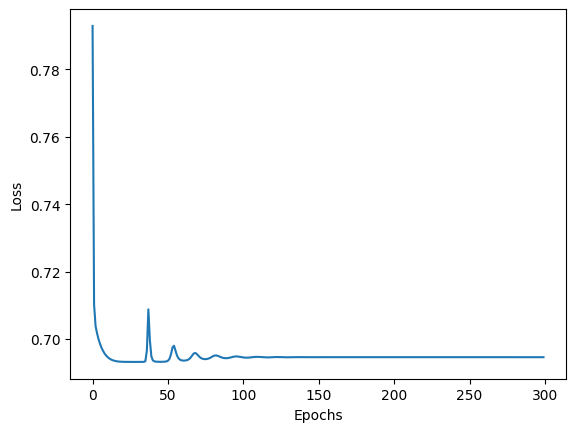

In [ ]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss");

In the plot of the training accuracy below, the accuracy values are mostly 0.5 -- not a good result.

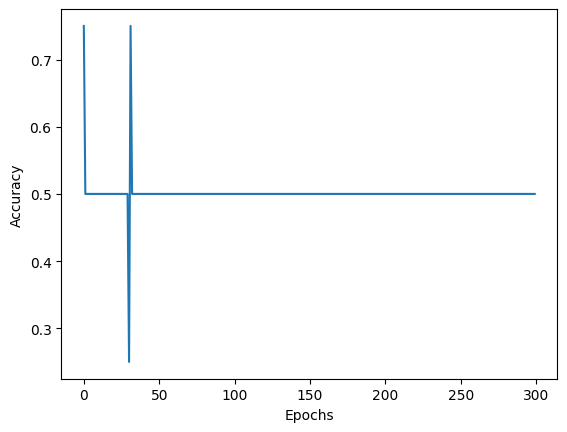

In [ ]:
plt.plot(history.history["acc"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy");

# Practice - Question 2 of 2

## Q2a (Perceptron and AND gate)

The following program simulates a perceptron by a sigmoid neuron for predicting the AND gate outputs.

In [ ]:
# Simulate a perceptron by a sigmoid neuron,
# with a float output between 0.0 and 1.0.
import numpy as np
from tensorflow import keras
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] & X[:, 1]
keras.utils.set_random_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(1, activation="sigmoid")
])
opt = keras.optimizers.RMSprop(learning_rate=.1)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["acc"])
history = model.fit(X, y, epochs=300, verbose=0)
y_pred = model.predict(X, verbose=0)
print("Actual y:", y)
print("Predicted y:", y_pred.round(2).ravel())

Actual y: [0 0 0 1]
Predicted y: [0. 0. 0. 1.]


Write code to create a plot of the training loss and a plot of the training accuracy. Make sure that you execute the above code cell and then your code cells of plotting.

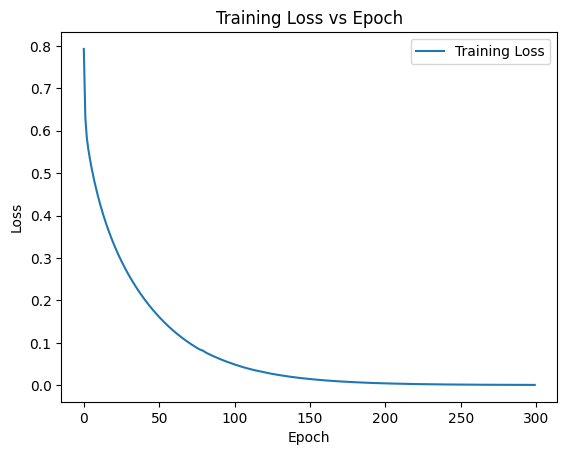

In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epoch')
plt.show()


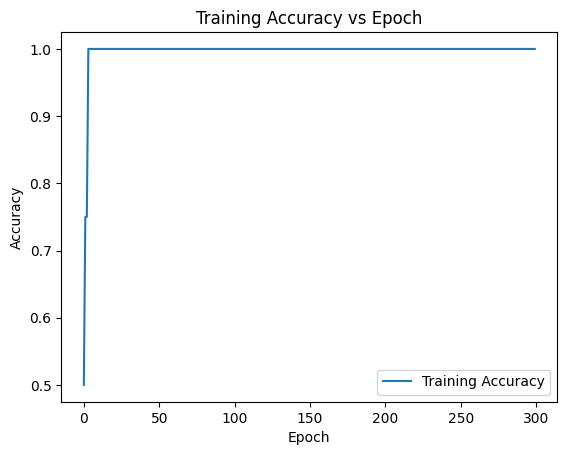

In [ ]:
# Plot training accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Epoch')
plt.show()

## Q2b (MLP and XOR gate)

The following program simulates a MLP of perceptrons by a MLP of sigmoid neurons for predicting the XOR gate outputs.

In [ ]:
# Simulate perceptrons in a MLP by sigmoid neurons,
# with a float output between 0.0 and 1.0.
import numpy as np
from tensorflow import keras
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
keras.utils.set_random_seed(42)
model = keras.models.Sequential([  # MLP
    keras.layers.Dense(2, activation="sigmoid"),
    keras.layers.Dense(1, activation="sigmoid")
])
opt = keras.optimizers.RMSprop(learning_rate=.1)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["acc"])
history = model.fit(X, y, epochs=300, verbose=0)
y_pred = model.predict(X, verbose=0)
print("Actual y:", y)
print("Predicted y:", y_pred.round(2).ravel())

Actual y: [0 1 1 0]
Predicted y: [0. 1. 1. 0.]


Write code to create a plot of the training loss and a plot of the training accuracy. Make sure that you execute the above code cell and then your code cells of plotting.

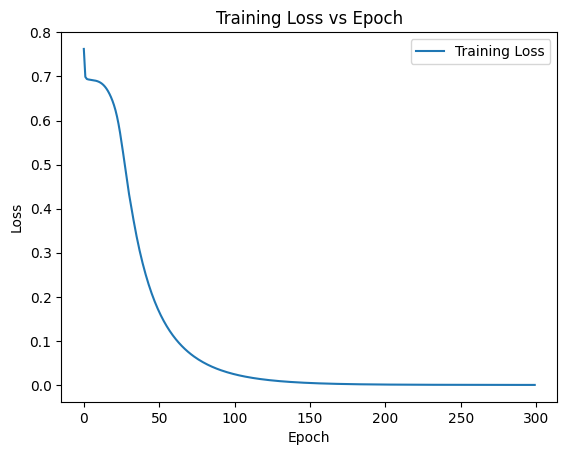

In [ ]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epoch')
plt.show()


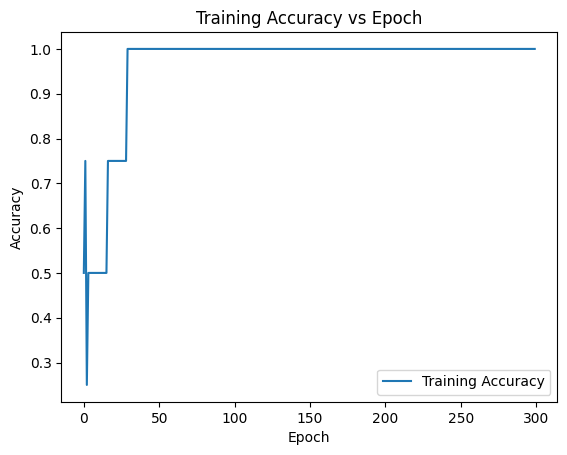

In [ ]:
# Plot training accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.legend()
plt.xlabel('Epoch')

plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Epoch')
plt.show()

## &#x2766;

# Extras

## Creating multiple subplots in a figure

Matplotlib supports putting multiple subplots in a figure, with a layout of a table or grid. Subplots can be created using the `subplot(nrows, ncols, index)` function, where the 3 parameters specify the number of rows of subplots, the number of columns of subplots, and the index of the current subplot to work on.

In the example below, `subplot(1, 2, 1)` specifies to use 2 subplots in 1 row and 2 columns and to work on the first subplot subsequently; after that, we plot a sine curve in the first subplot using the `plot()` function and so on. Similarly, `subplot(1, 2, 2)` specifies to use 2 subplots again but then to work on the second subplot subsequently; after that, we plot the cosine curve in the second subplot.

The call to `figure(figsize=[8, 4])` near the beginning sets a figure size of 8 inches by 4 inches; this fits the two subplots to a better aspect ratio. The call to `tight_layout()` near the end sets a tight layout to avoid overlapping of the subplots.

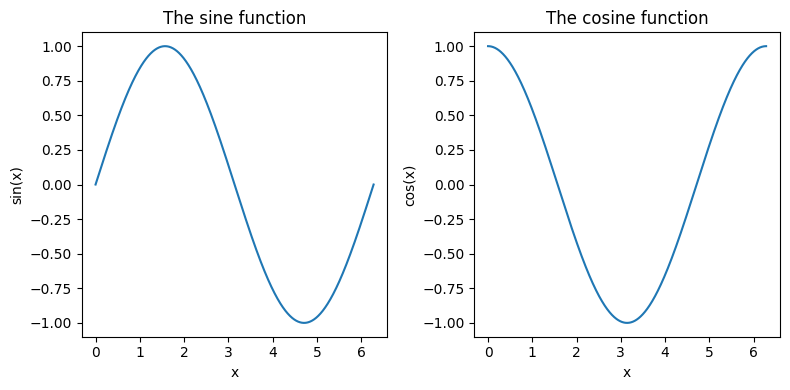

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2 * np.pi, 1000)
plt.figure(figsize=[8, 4])
plt.subplot(1, 2, 1)  # 1 row, 2 columns, do 1st plot; same as subplot(121)
plt.plot(x, np.sin(x))
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("The sine function")
plt.subplot(1, 2, 2)  # 1 row, 2 columns, do 2nd plot; same as subplot(122)
plt.plot(x, np.cos(x))
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.title("The cosine function")
plt.tight_layout()  # fit layout and spacing

### E1a

Create a figure of 3 subplots: the sine, cosine, and tangent functions. Refer to the above example of 2 subplots and remember to set the y limits of the tangent subplot to `[-10, 10]`.

## Displaying images

Matplotlib can also display images. Let's first obtain an image file. The following `curl` command downloads `logo.png` from the internet if necessary.

In [ ]:
![ -f logo.png ] || curl -o logo.png "https://adfs.ouhk.edu.hk/adfs/portal/logo/logo.png"
!ls -l *png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 71229  100 71229    0     0  37546      0  0:00:01  0:00:01 --:--:-- 37548
-rw-r--r-- 1 root root 71229 Jan 26 01:49 logo.png


In the code below, we use `imread(filename)` to load an image from the `logo.png` file, and use `imshow(image)` to display the image. The call to `axis("off")` hides the axes for a better view of the image.

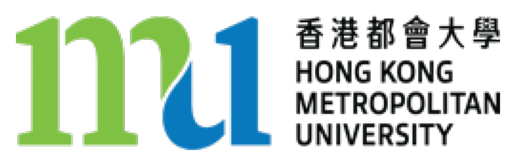

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread("logo.png")
plt.imshow(image)
plt.axis("off");

The image loaded from the `imread()` function is a NumPy array. For a PNG image, the array has 3 dimensions: the number of rows (i.e. image height), the number of columns (i.e. image width), and 4 values of a pixel (R, G, B, A values in range 0.0 to 1.0).

In [ ]:
print(type(image))
print(image.shape)  # nrows, ncols, RGBA for PNG
print(image[1, 1, :])  # first pixels

<class 'numpy.ndarray'>
(76, 260, 4)
[1. 1. 1. 0.]


### E1b

Based on the above example of displaying the `logo.png` file, add the following 4 lines of code after loading the image (i.e. `imread()`) and before displaying the image (i.e. `imshow()`).

```python
image[0, :, :] = [1, 0, 0, 1]  # first row
image[-1, :, :] = [1, 0, 0, 1]  # last row
image[:, 0, :] = [1, 0, 0, 1]  # first column
image[:, -1, :] = [1, 0, 0, 1]  # last column
```

These 4 lines of code modify the `image` array to draw 4 red lines: two horizontal lines at the top and bottom, and two vertical lines on the left and right, respectively. The list `[1, 0, 0, 1]` denotes a red pixel: the first three values R=1, G=0, B=0 specifying red and the fourth value A=1 specifying non-transparency (i.e. alpha or opacity).

Run the code to see the modified image.

## Solutions to extra exercises

### E1a

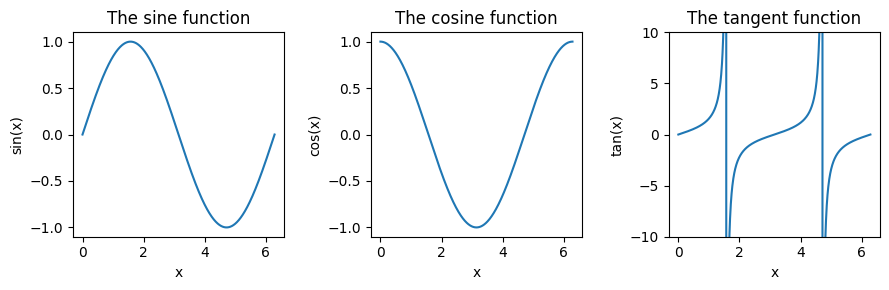

In [ ]:
# Solution
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2 * np.pi, 1000)
plt.figure(figsize=[9, 3])
plt.subplot(1, 3, 1)  # same as subplot(131)
plt.plot(x, np.sin(x))
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("The sine function")
plt.subplot(1, 3, 2)  # same as subplot(132)
plt.plot(x, np.cos(x))
plt.xlabel("x")
plt.ylabel("cos(x)")
plt.title("The cosine function")
plt.subplot(1, 3, 3)  # same as subplot(133)
plt.plot(x, np.tan(x))
plt.xlabel("x")
plt.ylabel("tan(x)")
plt.title("The tangent function")
plt.ylim([-10, 10])
plt.tight_layout()

### E1b

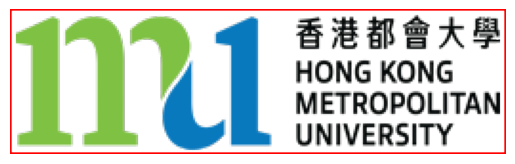

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread("logo.png")
image[0, :, :] = [1, 0, 0, 1]  # first row
image[-1, :, :] = [1, 0, 0, 1]  # last row
image[:, 0, :] = [1, 0, 0, 1]  # first column
image[:, -1, :] = [1, 0, 0, 1]  # last column
plt.imshow(image)
plt.axis("off");

## &#x2766;